In [1]:
import sys
sys.path.append("../script/")

import os

import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

def find_stats_string(dataset,header):
    titles = ['./benchmark/','./benchmark_DC/','./benchmark_xgb/','./benchmark_GBDT/','./benchmark_RF/']
    clfs = ['GP','Decision Tree','Xgboost','GBDT','Random Forest']
    means = []
    stds = []

    available_clfs = []
    for (i,title) in enumerate(titles):
        path = title+dataset+".csv"
        if os.path.isfile(path):
            available_clfs.append(clfs[i])

            df = pd.read_csv(path,names=header)
            mean = df.mean()
            std  = df.std()

            means.append(mean)
            stds.append(std)
    means = pd.DataFrame(means,index=available_clfs).T
    stds = pd.DataFrame(stds,index=available_clfs).T

    means.loc['num nodes'] = means.loc['num nodes'].round(2)
    stds.loc['num nodes'] = stds.loc['num nodes'].round(2)
    means.loc['num trees'] = means.loc['num trees'].round(2)
    stds.loc['num trees'] = stds.loc['num trees'].round(2)

    result = means.round(5).astype("string") +" +- "+ stds.round(4).astype("string")
    return result

def find_stats(dataset,header):
    titles = ['./benchmark/','./benchmark_DC/','./benchmark_xgb/','./benchmark_GBDT/','./benchmark_RF/']
    clfs = ['GP','Decision Tree','Xgboost','GBDT','Random Forest']
    means = []
    stds = []

    available_clfs = []
    for (i,title) in enumerate(titles):
        path = title+dataset+".csv"
        if os.path.isfile(path):
            available_clfs.append(clfs[i])

            df = pd.read_csv(path,names=header)
            mean = df.mean()
            std  = df.std()

            means.append(mean)
            stds.append(std)
    means = pd.DataFrame(means,index=available_clfs).T
    stds = pd.DataFrame(stds,index=available_clfs).T

    result = means.round(5)
    return result

# draw bar chart

In [2]:
dataset_name = ['confidence','vowel','prnn_synth','parity5','lupus','haberman','molecular','labor','cars','mnist_8_8_10']

dfs = []
for name in dataset_name:
    dfs.append(find_stats(name,['train acc','test acc','train f1/roc','test f1/roc','num trees','average depth','num nodes']))

shape = dfs[0].shape[0]
cols = [[] for i in range(shape)]
for df in dfs:
    for i in range(shape):
        cols[i].append(df.iloc[i])

benchmark = []

for c in cols:
    df = pd.DataFrame(c,index=dataset_name)
    df.columns.name = c[0].name
    benchmark.append(df)

## train

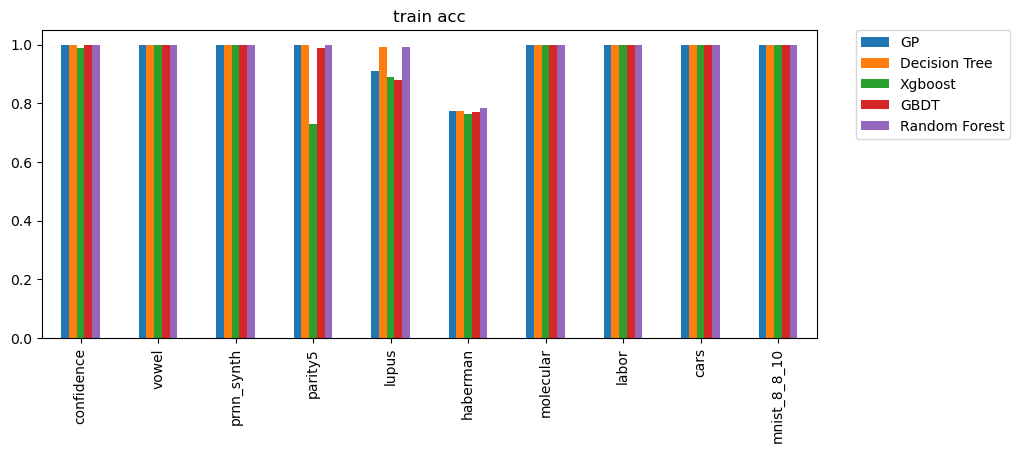

In [3]:
i = 0
benchmark[i].plot.bar(figsize=(10,4),title=benchmark[i].columns.name)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

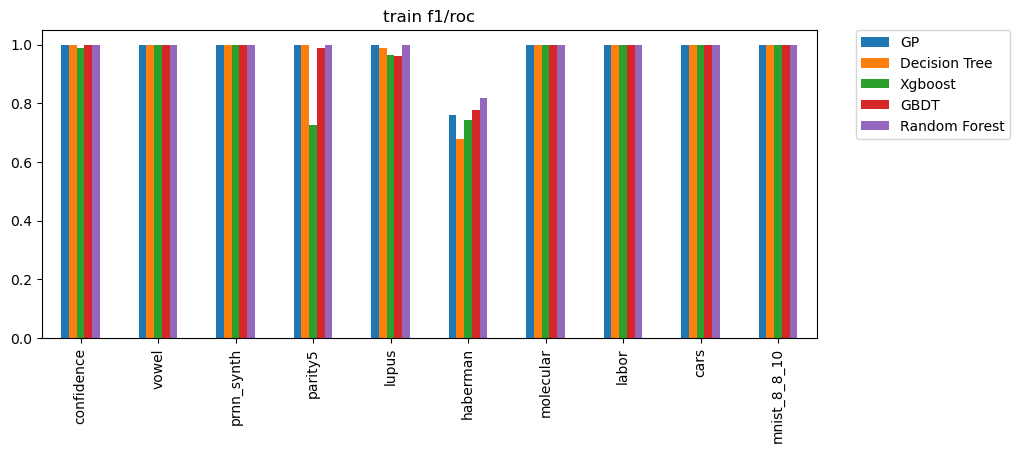

In [4]:
i = 2
benchmark[i].plot.bar(figsize=(10,4),title=benchmark[i].columns.name)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## test

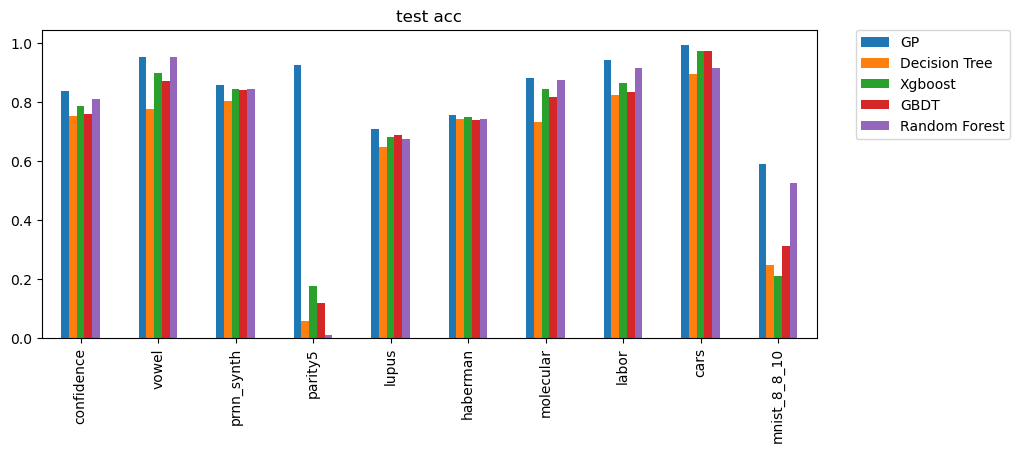

In [5]:
i = 1
benchmark[i].plot.bar(figsize=(10,4),title=benchmark[i].columns.name)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

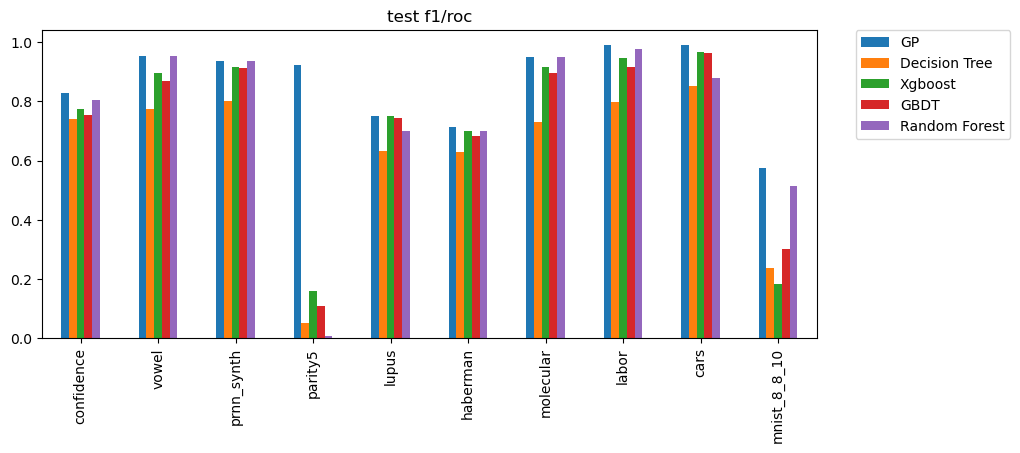

In [6]:
i = 3
benchmark[i].plot.bar(figsize=(10,4),title=benchmark[i].columns.name)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# complexity

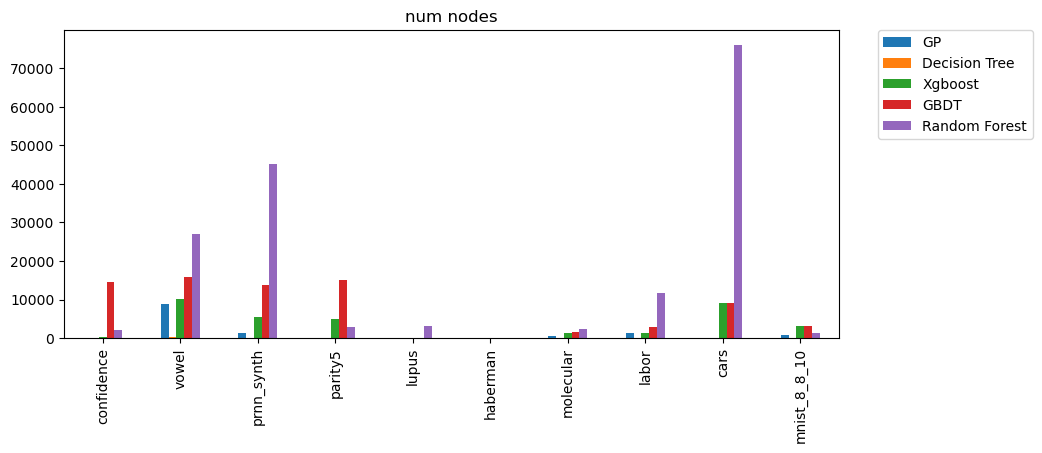

In [7]:
i = 6
benchmark[i].plot.bar(figsize=(10,4),title=benchmark[i].columns.name)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

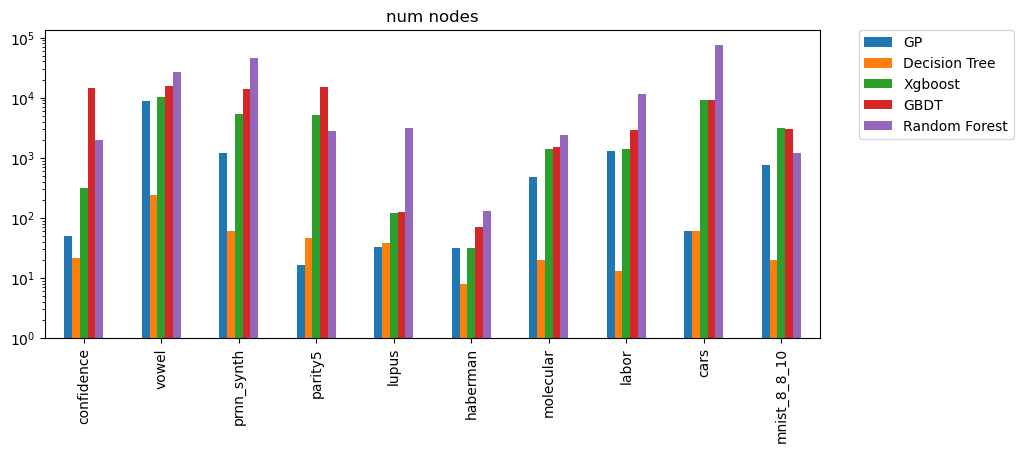

In [8]:
i = 6
benchmark[i].plot.bar(figsize=(10,4),title=benchmark[i].columns.name,log=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# print stats

In [9]:
dataset_name = ['confidence','vowel','prnn_synth','parity5','lupus','haberman','molecular','labor','cars','mnist_8_8_10']

dfs = []
for name in dataset_name:
    # dfs.append(find_stats_string(name,['train acc','test acc','train f1/roc','test f1/roc','num trees','average depth','num nodes']))
    dfs.append(find_stats(name,['train acc','test acc','train f1/roc','test f1/roc','num trees','average depth','num nodes']))

shape = dfs[0].shape[0]
cols = [[] for i in range(shape)]
for df in dfs:
    for i in range(shape):
        cols[i].append(df.iloc[i])

benchmark = []

for c in cols:
    df = pd.DataFrame(c,index=dataset_name)
    df.columns.name = c[0].name
    benchmark.append(df)

## train

In [10]:
benchmark[0].T

,confidence,vowel,prnn_synth,parity5,lupus,haberman,molecular,labor,cars,mnist_8_8_10
train acc,,,,,,,,,,
GP,0.99867,1.0,1.0,1.00000,0.90889,0.77368,1.0,1.00000,1.0,1.0
Decision Tree,1.00000,1.0,1.0,1.00000,0.99056,0.77336,1.0,1.00000,1.0,1.0
Xgboost,0.98867,1.0,1.0,0.72933,0.88889,0.76526,1.0,0.99829,1.0,1.0
GBDT,1.00000,1.0,1.0,0.98933,0.87833,0.76963,1.0,1.00000,1.0,1.0
Random Forest,1.00000,1.0,1.0,1.00000,0.99056,0.78349,1.0,1.00000,1.0,1.0


In [11]:
rank = benchmark[0].T.rank(ascending=False)
rank.sum(axis=1)/rank.shape[1]

train acc
GP               2.85
Decision Tree    2.60
Xgboost          3.90
GBDT             3.25
Random Forest    2.40
dtype: float64

In [12]:
benchmark[2].T

,confidence,vowel,prnn_synth,parity5,lupus,haberman,molecular,labor,cars,mnist_8_8_10
train f1/roc,,,,,,,,,,
GP,0.99868,1.0,1.0,1.00000,0.99738,0.76135,1.0,1.0,1.0,1.0
Decision Tree,1.00000,1.0,1.0,1.00000,0.99009,0.67816,1.0,1.0,1.0,1.0
Xgboost,0.98848,1.0,1.0,0.72709,0.96318,0.74172,1.0,1.0,1.0,1.0
GBDT,1.00000,1.0,1.0,0.98932,0.96084,0.77660,1.0,1.0,1.0,1.0
Random Forest,1.00000,1.0,1.0,1.00000,0.99967,0.81969,1.0,1.0,1.0,1.0


In [13]:
rank = benchmark[2].T.rank(ascending=False)
rank.sum(axis=1)/rank.shape[1]

train f1/roc
GP               2.9
Decision Tree    3.0
Xgboost          3.6
GBDT             3.1
Random Forest    2.4
dtype: float64

## test

In [14]:
benchmark[1].T

,confidence,vowel,prnn_synth,parity5,lupus,haberman,molecular,labor,cars,mnist_8_8_10
test acc,,,,,,,,,,
GP,0.83788,0.95309,0.85822,0.92381,0.70741,0.75652,0.88125,0.94259,0.99379,0.58899
Decision Tree,0.75303,0.77576,0.80252,0.05714,0.64691,0.74203,0.73333,0.82315,0.89284,0.24868
Xgboost,0.78636,0.89776,0.84311,0.17619,0.68272,0.74819,0.84375,0.86296,0.97345,0.20949
GBDT,0.76061,0.87015,0.83956,0.11905,0.68889,0.73913,0.81562,0.83519,0.97203,0.31336
Random Forest,0.80909,0.95219,0.84533,0.00952,0.67284,0.74203,0.87292,0.91481,0.91554,0.52634


In [15]:
rank = benchmark[1].T.rank(ascending=False)
rank.sum(axis=1)/rank.shape[1]

test acc
GP               1.00
Decision Tree    4.65
Xgboost          2.90
GBDT             3.60
Random Forest    2.85
dtype: float64

In [16]:
benchmark[3].T

,confidence,vowel,prnn_synth,parity5,lupus,haberman,molecular,labor,cars,mnist_8_8_10
test f1/roc,,,,,,,,,,
GP,0.82744,0.95296,0.93561,0.92257,0.74962,0.71271,0.95013,0.98981,0.99161,0.57578
Decision Tree,0.74135,0.77554,0.80208,0.05000,0.63231,0.62956,0.73042,0.79955,0.85264,0.23529
Xgboost,0.77482,0.89735,0.91484,0.15919,0.75095,0.69900,0.91602,0.94630,0.96677,0.18376
GBDT,0.75414,0.87041,0.91406,0.10701,0.74271,0.68295,0.89701,0.91644,0.96264,0.30158
Random Forest,0.80368,0.95197,0.93510,0.00833,0.69915,0.69859,0.94876,0.97685,0.87863,0.51342


In [17]:
rank = benchmark[3].T.rank(ascending=False)
rank.sum(axis=1)/rank.shape[1]

test f1/roc
GP               1.1
Decision Tree    4.8
Xgboost          2.7
GBDT             3.6
Random Forest    2.8
dtype: float64

## complexity

In [18]:
benchmark[6].T.round(0)

,confidence,vowel,prnn_synth,parity5,lupus,haberman,molecular,labor,cars,mnist_8_8_10
num nodes,,,,,,,,,,
GP,48.0,8894.0,1177.0,15.0,32.0,31.0,483.0,1304.0,60.0,754.0
Decision Tree,20.0,242.0,59.0,46.0,38.0,7.0,19.0,12.0,60.0,19.0
Xgboost,311.0,10098.0,5389.0,5059.0,121.0,30.0,1372.0,1423.0,9000.0,3100.0
GBDT,14480.0,15908.0,13817.0,14936.0,126.0,70.0,1484.0,2889.0,9000.0,3016.0
Random Forest,2005.0,27110.0,45291.0,2740.0,3091.0,131.0,2424.0,11676.0,76137.0,1207.0


In [19]:
rank = benchmark[6].T.rank(ascending=True)
rank.sum(axis=1)/rank.shape[1]

num nodes
GP               1.90
Decision Tree    1.20
Xgboost          3.25
GBDT             4.15
Random Forest    4.50
dtype: float64

# overall

In [33]:
ranks = []
for i in range(4):
    rank = benchmark[i].T.rank(ascending=False)
    rank = rank.sum(axis=1)/rank.shape[1]

    ranks.append(rank)
rank = pd.DataFrame(ranks,index=['train acc','test acc','train f1/roc','test f1/roc']).T


In [34]:
rank

,train acc,test acc,train f1/roc,test f1/roc
GP,2.85,1.00,2.9,1.1
Decision Tree,2.60,4.65,3.0,4.8
Xgboost,3.90,2.90,3.6,2.7
GBDT,3.25,3.60,3.1,3.6
Random Forest,2.40,2.85,2.4,2.8


In [37]:
rank.sum(axis=1)/4

GP               1.9625
Decision Tree    3.7625
Xgboost          3.2750
GBDT             3.3875
Random Forest    2.6125
dtype: float64